In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [52]:
#User inputs
npts=5000 # for p mesh
nt=1000    # for time array
maxTime=1
time=np.linspace(0,maxTime,nt)
beta=100 # velocity
z=2.5     # vertical distance
x=1.2     # horizontal distance
R=np.sqrt(x**2+z**2) # ray length
print('What is value of R/Beta?\n',R/beta, 'seconds')


What is value of R/Beta?
 0.0277308492477 seconds


In [17]:
def cartesian(arrays, out=None):
    """
    CREDIT: http://stackoverflow.com/questions/1208118/using-numpy-to-build-an-array-of-all-combinations-of-two-arrays
    
    Generate a cartesian product of input arrays.

    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.

    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.

    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])

    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in range(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out


In [55]:
# generate an array of all possible p values (Re(p), Im(p))
p=cartesian((np.arange(0,npts),np.arange(0,npts)))
p_complex=[p[n][0]+1j*p[n][1] for n in range(npts*npts)]


/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:48: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:50: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [40]:
p_complex=np.reshape(p_complex,(npts,npts)).T
np.shape(p_complex)

(5000, 5000)

In [56]:
# find p values
pSln=[]
for t in time:
    if t<=R/beta:
        pSln.append((x*t-np.abs(z)*np.sqrt(((R**2/beta**2)-t**2)))/R**2)
    elif t>=R/beta:
        pSln.append((x*t+np.abs(z)*1j*np.sqrt(t**2-(R**2/beta**2)))/R**2)
    else:
        print('Error with p calculation')


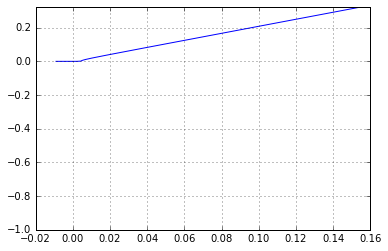

In [57]:
# plot line integral in p space
plt.plot(np.real(pSln),np.imag(pSln))
plt.ylim([-1,max(np.imag(pSln))])
plt.grid()

In [20]:
# find max(dt(p)/d(p))
